In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import glob
import os,sys
# Import Python Libraries
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
acpc_workspace='/gws/nopw/j04/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu/acpc_intercomparison')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison import load_variable_cube,color,variable_names,directory,filename
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import defaultdict, OrderedDict
f = lambda: defaultdict(f) 

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

In [3]:
plotdir = '/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2023/'
os.makedirs(plotdir,exist_ok=True)



savedir=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Save_Apr2020')
os.makedirs(savedir,exist_ok=True)


In [4]:
models=[]
models.append('RAMS_CSU')
models.append('COSMO_KIT')
models.append('UM_LEEDS')
models.append('MesoNH_Toulouse')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

modelnames=[]
modelnames.append('RAMS')
modelnames.append('COSMO')
modelnames.append('UM')
modelnames.append('MesoNH')
modelnames.append('NU-WRF')
modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')

cases=[]
cases.append('POL')
cases.append('CLN')
dx = '500m'
dt = '5m'

ylbl_txt = 'Domain Mean \n OLR (W$m^{-2}$)'


#### SET DATE SPECIFICS
import matplotlib.dates as mdates
dateFmt = mdates.DateFormatter('%HH')
dateB = datetime.datetime(2013,6,19,16)
dateE = datetime.datetime(2013,6,20,4)
time_range=[dateB,dateE]
constraint_time=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])

varname = 'OLR'
units_txt = " (W/m2)"
scale_factor = 1;
savename_extra='_wSBM'

ylims_a = [200,310]
ylims_p = [-1,1]



### SET CONTOUR LEVELS
############################################################################
cntr_p_lvls = np.arange(-1,1,0.05)
# cntr_d_lvls = calculated below for each model
############################################################################

### QCLD cntr_lvls = np.arange(-4,0.5,0.2); cntr_p_lvls = np.arange(-1,1,0.05)
### QRAIN cntr_lvls = np.arange(-4,0.5,0.2); cntr_p_lvls = np.arange(-1,1,0.05)
### QTL cntr_lvls = np.arange(-1,4,0.2); cntr_p_lvls = np.arange(-1,1,0.05)

### QICE cntr_lvls = np.arange(-4,0.5,0.2); cntr_p_lvls = np.arange(-2,2,0.05)

### NCLD cntr_lvls = np.arange(2,9,0.2); cntr_p_lvls = np.arange(-10,10,0.05)
### NRAIN cntr_lvls = np.arange(-1,4,0.2); cntr_p_lvls = np.arange(-1,1,0.05)


/gws/nopw/j04/acpc/houston_deep_convection/Processing/Save_Apr2020/OLR
RAMS_CSU POL
RAMS_CSU CLN
COSMO_KIT POL
COSMO_KIT CLN
UM_LEEDS POL
UM_LEEDS CLN
MesoNH_Toulouse POL
MesoNH_Toulouse CLN
WRF_NASA POL
WRF_NASA CLN
WRF_OXF POL
WRF_OXF CLN
WRF_PNNL POL
WRF_PNNL CLN


NameError: name 'xdates' is not defined

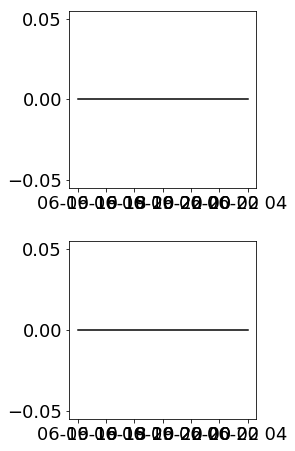

In [6]:
#########################################################
# Load and plot data 2D Data

#########################################################
ls={}
ls['CLN']='--'
ls['POL']='-'

matplotlib.rcParams.update({'font.size': 18})
savedir_i=os.path.join(savedir,varname)
print(savedir_i)
var_plot={}
for model in models:
    for case in cases:
        print(model,case)
#        var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_vint_sum_{model}_{case}_{dx}_{dt}.nc'))
        if model == 'UM_LEEDS':
            var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_1h.nc'))
            var_plot[model,case] = var_plot[model,case]
        else:
            var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_{dt}.nc'))
            var_plot[model,case] = var_plot[model,case][0:144]

#########################################################################################
# Load and plot data for vertically integrated values (Differences and % Differences)
#########################################################################################

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20/2.54,16/2.54))
fig.subplots_adjust(left=0.05,right=0.38,hspace=0.3,
                     bottom=0.05,top=0.95,wspace=0)

ax[0].plot([dateB,dateE],[0,0],'-k')
ax[1].plot([dateB,dateE],[0,0],'-k')

ax[1].plot(xdates[0:144],np.zeros(len(xdates[0:144])),
                    color='k',
                    ls='-',                         
                    label='High-Aero')

ax[1].plot(xdates[0:144],np.zeros(len(xdates[0:144])),
                    color='k',
                    ls='--',                         
                    label='Low-Aero')

#ax.plot([0,0],[0,20],'-k')

cntm = 0
for model in models:

    xdates = []
    for j in np.arange(0,np.shape(var_plot[model,case].coord('time'))[0]):
        cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_plot[model,'CLN'].coord('time').points[j])
        #print(cur_date)
        xdates = np.append(xdates,cur_date)
    
    if model == 'UM_LEEDS':
        ax[0].plot(xdates[0:27],np.abs(var_plot[model,'POL'][0:27].data),
                            color=color[model],
                            ls='-',                         
                            label=modelnames[cntm])

        ax[0].plot(xdates[0:27],np.abs(var_plot[model,'CLN'][0:27].data),
                            color=color[model],
                            ls='--',                         
                            label='_nolegend_')
                    
        ax[1].plot(xdates[0:27],(np.abs(var_plot[model,'POL'][0:27].data)-np.abs(var_plot[model,'CLN'][0:27].data))/np.abs(var_plot[model,'CLN'][0:27].data)*100,
                            color=color[model],
                            ls='-',                         
                            label='_nolegend_')
    else:
    
        ax[0].plot(xdates[0:144],np.abs(var_plot[model,'POL'].data),
                            color=color[model],
                            ls='-',                         
                            label=modelnames[cntm])

        ax[0].plot(xdates[0:144],np.abs(var_plot[model,'CLN'].data),
                            color=color[model],
                            ls='--',                         
                            label='_nolegend_')
                   
                   
        ax[1].plot(xdates[0:144],(np.abs(var_plot[model,'POL'].data)-np.abs(var_plot[model,'CLN'].data))/np.abs(var_plot[model,'CLN'].data)*100,
                            color=color[model],
                            ls='-',                         
                            label='_nolegend_')
    cntm = cntm+1

        
ax[0].set_xlim(dateB,dateE)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax[0].set_ylabel('Domain Mean \n OLR (W ${m^2}$)')
ax[0].set_ylim(ylims_a)
ax[0].set_title('(a) Domain Mean OLR',fontsize=17)

ax[1].set_title('(b) OLR Percentage Difference (High-Low)',fontsize=17)
ax[1].set_xlim(dateB,dateE)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax[1].set_ylabel('% Diff. in OLR \n (High-Low)')
ax[1].set_ylim([-10,10])
ax[1].set_xlabel('19-20 June HH (UTC Time)')
ax[1].grid()
ax[0].grid()

handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.06])
fig.legend(handles, labels, fontsize=10, loc='lower left', ncol=1, bbox_to_anchor=[0.825,0.67])

handles, labels = ax[1].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
fig.legend(handles, labels, fontsize=10, loc='lower left',ncol=1, bbox_to_anchor=[0.825,0.59])

plt.tight_layout()
filename=varname+'_DIF_Time_'+savename_extra+'.pdf'
fig.savefig(os.path.join(plotdir,filename),dpi=300)  

/gws/nopw/j04/acpc/houston_deep_convection/Processing/Save_Apr2020/OLR
RAMS_CSU POL
RAMS_CSU CLN
COSMO_KIT POL
COSMO_KIT CLN
UM_LEEDS POL
UM_LEEDS CLN
WRF_NASA POL
WRF_NASA CLN
MesoNH_Toulouse POL
MesoNH_Toulouse CLN
WRF_OXF POL
WRF_OXF CLN
WRF_PNNL POL
WRF_PNNL CLN


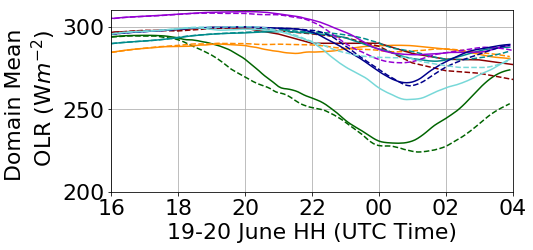

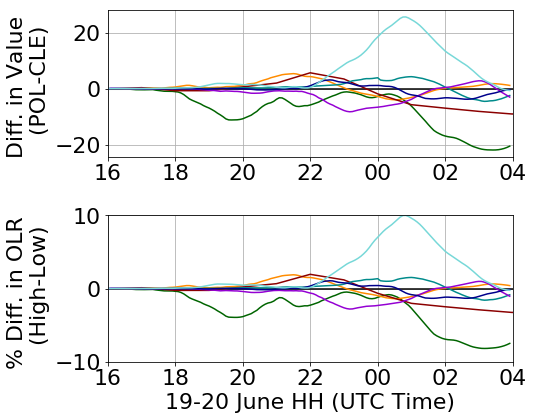

In [8]:
#########################################################
# Load and plot data 2D Data

#########################################################
ls={}
ls['CLN']='-'
ls['POL']='--'

matplotlib.rcParams.update({'font.size': 22})
savedir_i=os.path.join(savedir,varname)
print(savedir_i)
var_plot={}
for model in models:
    for case in cases:
        print(model,case)
#        var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_vint_sum_{model}_{case}_{dx}_{dt}.nc'))
        if model == 'UM_LEEDS':
            var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_1h.nc'))
            var_plot[model,case] = var_plot[model,case]
        else:
            var_plot[model,case]=iris.load_cube(os.path.join(savedir_i,f'{varname}_xy_mean_{model}_{case}_{dx}_{dt}.nc'))
            var_plot[model,case] = var_plot[model,case][0:144]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(20/2.54,10/2.54))
fig.subplots_adjust(left=0.1,right=0.95,hspace=0.3,
                     bottom=0.1,top=0.85,wspace=0.2)

ax.plot([0,0],[0,20],'-k')


for model in models:
    for case in cases:
        xdates = []
        if case == 'POL':
            casename = 'High Aero'
        else:
            casename = 'Low Aero'
        for j in np.arange(0,np.shape(var_plot[model,case].coord('time'))[0]):
            cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_plot[model,case].coord('time').points[j])
            #print(cur_date)
            xdates = np.append(xdates,cur_date)
        ax.plot(xdates[0:144],np.abs(var_plot[model,case].data),
                        color=color[model],
                        ls=ls[case],                         
                        label=f'{model} {casename}')

#ax.legend(fontsize=12,loc='lower left',bbox_to_anchor=(1.04, 0))
ax.set_xlim(dateB,dateE)
ax.set_ylim(ylims_a)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax.set_ylabel(ylbl_txt)
ax.set_xlabel('19-20 June HH (UTC Time)')
ax.grid()
plt.tight_layout()

#filename=varname+'_Time_'+savename_extra+'.pdf'
#fig.savefig(os.path.join(plotdir,filename),dpi=300)        
#plt.close(fig)

#########################################################################################
# Load and plot data for vertically integrated values (Differences and % Differences)
#########################################################################################

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(20/2.54,16/2.54))
fig.subplots_adjust(left=0.1,right=0.95,hspace=0.3,
                     bottom=0.1,top=0.85,wspace=0.2)

ax[0].plot([dateB,dateE],[0,0],'-k')
ax[1].plot([dateB,dateE],[0,0],'-k')

#ax.plot([0,0],[0,20],'-k')

for model in models:

    xdates = []
    for j in np.arange(0,np.shape(var_plot[model,case].coord('time'))[0]):
        cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_plot[model,'CLN'].coord('time').points[j])
        #print(cur_date)
        xdates = np.append(xdates,cur_date)
    
    if model == 'UM_LEEDS':
        ax[0].plot(xdates[0:27],np.abs(var_plot[model,'POL'][0:27].data)-np.abs(var_plot[model,'CLN'][0:27].data),
                            color=color[model],
                            ls='-',                         
                            label=f'{model}')

        ax[1].plot(xdates[0:27],(np.abs(var_plot[model,'POL'][0:27].data)-np.abs(var_plot[model,'CLN'][0:27].data))/np.abs(var_plot[model,'CLN'][0:27].data)*100,
                            color=color[model],
                            ls='-',                         
                            label=f'{model}')
    else:
    
        ax[0].plot(xdates[0:144],np.abs(var_plot[model,'POL'].data)-np.abs(var_plot[model,'CLN'].data),
                            color=color[model],
                            ls='-',                         
                            label=f'{model}')

        ax[1].plot(xdates[0:144],(np.abs(var_plot[model,'POL'].data)-np.abs(var_plot[model,'CLN'].data))/np.abs(var_plot[model,'CLN'].data)*100,
                            color=color[model],
                            ls='-',                         
                            label=f'{model}')
    
ax[0].set_xlim(dateB,dateE)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax[0].set_ylabel('Diff. in Value \n (POL-CLE)')
ax[1].set_ylim([-25,25])
#ax[0].legend(fontsize=12,bbox_to_anchor=(1.07, 1.05))

ax[1].set_xlim(dateB,dateE)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
ax[1].set_ylabel('% Diff. in OLR \n (High-Low)')
ax[1].set_ylim([-10,10])
ax[1].set_xlabel('19-20 June HH (UTC Time)')
ax[1].grid()
ax[0].grid()
plt.tight_layout()
#filename=varname+'_DIF_Time_'+savename_extra+'.pdf'
fig.savefig(os.path.join(plotdir,filename),dpi=300)  

In [14]:
print(var_plot[model,'POL'])

LWup_TOA / (1)                      (time: 35)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          latitude: 29.42396, bound=(28.386019, 30.4619)
          longitude: -95.13139, bound=(-96.35279, -93.909996)
          x: 240, bound=(6, 474)
          y: 240, bound=(10, 470)
     Attributes:
          Conventions: CF-1.5
     Cell methods:
          mean: x, y


In [24]:
case = 'POL'
xdates = []
for j in np.arange(0,np.shape(var_plot[model,case].coord('time'))[0]):
    cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=var_plot[model,case].coord('time').points[j])
    #print(cur_date)
    xdates = np.append(xdates,cur_date)
print(xdates)
print(len(xdates))

[datetime.datetime(2013, 6, 19, 12, 59, 59, 999987)
 datetime.datetime(2013, 6, 19, 14, 0, 0, 13)
 datetime.datetime(2013, 6, 19, 15, 0)
 datetime.datetime(2013, 6, 19, 15, 59, 59, 999987)
 datetime.datetime(2013, 6, 19, 17, 0, 0, 13)
 datetime.datetime(2013, 6, 19, 18, 0)
 datetime.datetime(2013, 6, 19, 18, 59, 59, 999987)
 datetime.datetime(2013, 6, 19, 20, 0, 0, 13)
 datetime.datetime(2013, 6, 19, 21, 0)
 datetime.datetime(2013, 6, 19, 21, 59, 59, 999987)
 datetime.datetime(2013, 6, 19, 23, 0, 0, 13)
 datetime.datetime(2013, 6, 20, 0, 0)
 datetime.datetime(2013, 6, 20, 0, 59, 59, 999987)
 datetime.datetime(2013, 6, 20, 2, 0, 0, 13)
 datetime.datetime(2013, 6, 20, 3, 0)
 datetime.datetime(2013, 6, 20, 3, 59, 59, 999987)
 datetime.datetime(2013, 6, 20, 5, 0, 0, 13)
 datetime.datetime(2013, 6, 20, 6, 0)
 datetime.datetime(2013, 6, 20, 6, 59, 59, 999987)
 datetime.datetime(2013, 6, 20, 8, 0, 0, 13)
 datetime.datetime(2013, 6, 20, 9, 0)
 datetime.datetime(2013, 6, 20, 9, 59, 59, 999987)


In [17]:
np.shape(var_plot[model,case].coord('time'))[0]

27

In [20]:
print(var_plot[model,'CLN'])

LWup_TOA / (1)                      (time: 27)
     Dimension coordinates:
          time                           x
     Scalar coordinates:
          latitude: 29.42396, bound=(28.386019, 30.4619)
          longitude: -95.13139, bound=(-96.35279, -93.909996)
          x: 240, bound=(6, 474)
          y: 240, bound=(10, 470)
     Attributes:
          Conventions: CF-1.5
     Cell methods:
          mean: x, y
